# ${\Large \infty}$ Monte Carlo

## An adventure of Egon

In [2]:
# Some Python utility code
from pathlib import Path
home = str(Path.home()) + '/'
data = home + 'data/'             # A non-repository location for datasets of interest

def dirobj(obj): return [x for x in dir(obj) if not x.startswith('__')]

def lsal(path=''):
    import os
    return os.popen('ls -al ' + path).readlines()

def ShowGitHubImage(username, repo, folder, source, localcopyname, width, height):
    import requests, shutil
    from PIL import Image
    outf = home + localcopyname
    f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + source
    a = requests.get(f, stream = True)
    if a.status_code == 200:
        with open(outf, 'wb') as f:
            a.raw.decode_content = True
            shutil.copyfileobj(a.raw, f)
    return Image.open(outf).resize((width,height),Image.ANTIALIAS)

def ShowLocalImage(pathfromhome, filename, width, height):
    import shutil
    from PIL import Image
    global home
    f = home + '/' + pathfromhome + '/' + filename 
    return Image.open(f).resize((width,height),Image.ANTIALIAS)

# Test either of the 'Show Image' functions
# ShowGitHubImage('robfatland', 'othermathclub', 'images/cellular', 'conus_textile_shell_2.png', 'ctextile.jpg', 450, 250)
# ShowLocalImage('.', 'ctextile.jpg', 450, 250)

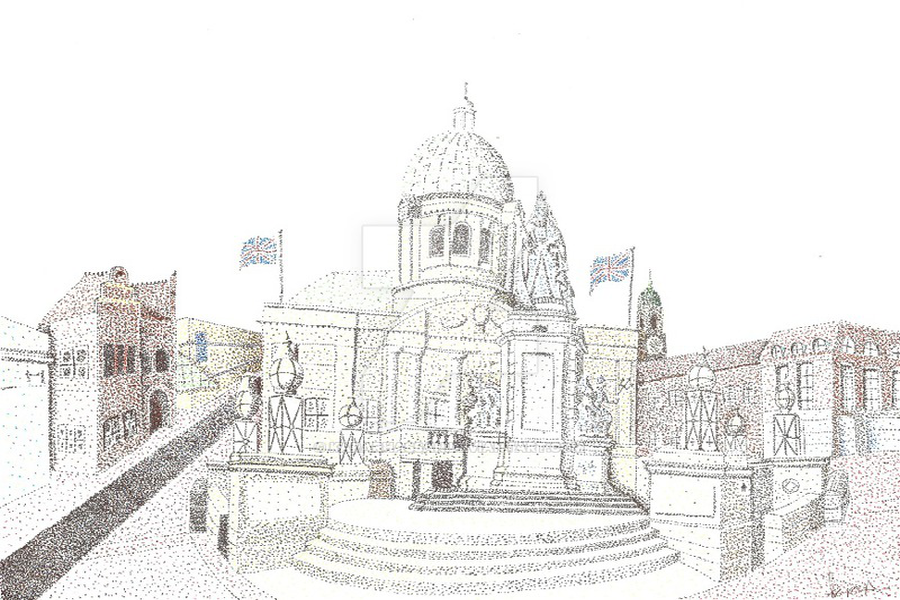

In [3]:
ShowLocalImage('othermathclub/images/egon/', 'town_square.jpg',900,600)

*pointillist drawing of a town square*

### Friendly introduction


This page: We will begin with a story that leads to playing around with a computer program.
The computer program draws a lot of dots. I'm excited! (By the way this is one of the paths
to fractals.) The computer programs are a bit long but not to worry: As always you simply
click on the cell to give it a green outline and do Shift + Enter. These take a minute to
finish. They have slider controls so you can do experiments easily.


Now here's the story. The town of Monte Carlo is located on the northwestern coast of 
the Mediterranean Sea. It is famous for its casinos and opportunities for gambling:
Games of chance like dice or roulette. Now rolling a dice
is a probability experiment... but *probability* and *randomness* is a different subject so here in
Monte Carlo we'll assume everyone is comfortable with that.
Our goal is to put probability to work for us, a method called *Monte Carlo*
invented by mathematicians and named after our town. In Monte Carlo we use randomness to 
answer mathematical questions.


One fine day a pirate who has been attending a party feels tired and returns to the harbor
to fall asleep in her hammock on board her boat. She heads towards the wharf where
her boat is tied at the far end. 
(A *wharf* goes out from shore and boats tie up to it.)
This wharf is 21 steps wide and 100 steps long. The pirate's ship is at the far end.
Unfortunately it is dark and before she gets to the wharf she bangs her head into
an anchor secured to the bow of another boat. She is ok but very dizzy. 


If she can walk the 100 steps to reach her ship all will be well.
The problem is that after every step forward towards her ship 
she stumbles sideways: Either to her left or her right at random, one step. 
Too many stumbles to the left or to the right: You see the problem.  She will tumble
off the side of the wharf into the cold water.
What is the probability she makes it safely to her ship if she
starts at the center of the wharf? What if she begins at the left 
side of the wharf? 


The point is that you can imagine tracing her progress on paper by flipping a coin
at each step. This will take some time; but of course we can write a computer program 
that does this for us, not once but a million times. Now suppose that we determine
in this way her probability of making it to her ship. What if we make
the wharf longer? or shorter? or wider or narrower? We can answer such questions
by modifying our computer program... a tool for exploring the general problem. 

You are welcome to work on this problem but we will come back to it further along
(not in this notebook but in the sequel **Monte Carlo 2**). Our story first
takes a swerve off in a new direction: 
We need to meet Egon, a slightly eccentric artist who lives in Monte Carlo.

### Terminology


Write down the **boldface** terms and their definitions in your notebook. Explain the *other* terms 
to a friend. 


- **probability**: The study of randomness
- **probability**: As likelihood; a number between 0 and 1 inclusive
- sampling: Looking for patterns by making measurements
- **Monte Carlo method**: Exploring a mathematical idea using a computer that in turn uses random numbers
- Egon: An imaginary pointillist painter
- Pointillism: Drawing pictures using dots or points
- Point: A dot with no size or dimension
- Paint dot: An approximate point... but it must have some size since we can see it
- chaos: unpredictable, wildly erratic behavior 
- order: a clear and sensible pattern, the antithesis of chaos
- antithesis: opposite
- uniformly random: a random process where all outcomes are equally likely (have the same probability) 
- dice: a cube (or cubes) with six faces labeled 1, 2, 3, 4, 5, 6
  - how might you change this definition to make it more general? (the term 'polyhedron' might be useful)
- algorithm: A method for solving a problem

### Egon in the Monte Carlo piazza


This story is a bit like our drunken pirate described above... except nobody is going to fall into 
the harbor.  It concerns an artist we make up whose name will be Egon. 


Egon is a painter and a poet. He lives in the beautiful town of Monte Carlo by the sea. In the center
of this town is the town square, a large flat brick plaza. Egon wishes to paint something on the town square 
but he does not know what... 


One day Egon happens to find a dice in his beard. Egon rolls the dice; it comes up $4$. He keeps rolling; and 
of course each time he gets a number from one to six. Egon thinks about this... and he hatches a plan. 


- Egon sets three empty paint cans A, B and C on the ground to make a huge triangle in the town square
- He rolls his dice. 
  - On a 1 or a 2 he walks half way to paint can A
  - On a 3 or a 4 he walks half way to paint can B
  - On a 5 or a 6 he walks half way to paint can C
- He paints a dot on the ground
- From that spot: He repeats the process: He rolls the dice again to select a paint can, goes half way, paints a dot


Now if Egon repeats the process 17 times he will have 17 dots. 


${\Huge \infty}$


To write in your notebook: Consider carefully!
What do you suppose the pattern of dots looks like? 



The computer program below simulates Egon's painting process using a random number 
generator for the dice. It shows you what the plaza looks like after 17 dots. 
You can change the number of dots using the sliders. First try the nDots slider:
That goes as high as 500. Then use the multiplier slider to do lots more.

In [6]:
# import the numerical Python library
import numpy as np
from random import random as can_coord
from random import randint as die
from ipywidgets import *
from traitlets import dlink

# To see random cans set this value to True
random_cans = False

# Can locations: Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
canA = np.array([0.0, 0.0])
canB = np.array([1.0, 0.0])
canC = np.array([0.5, np.sqrt(3.0)/2.0])

# This is a method for jumping half way to point 'b' from point 'a'
def MoveHalfway(a, b): return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Choose_the_next_can():   
    die_roll = die(1,6)
    if die_roll < 3:   return (canA, 'r')
    elif die_roll < 5: return (canB, 'g') 
    else:              return (canC, 'b')

def EgonPaints(nDotsParameter):
    nDots = 16 + nDotsParameter**2
    x = [np.array([0.1, 0.7])]
    c = ['k'] 
    
    # This loop does all of Egon's work for him
    for i in range(nDots): 
        (next_can, next_color) = Choose_the_next_can()
        x.append(MoveHalfway(x[-1], next_can))
        c.append(next_color)

    print('total number of dots Egon just painted is', nDots)
    
    # this breaks out Egon's dot locations into two lists: xc[] and yc[]
    xc, yc = [q[0] for q in x], [q[1] for q in x]   

    # Figure needs to be big but small enough to fit on the screen with the slider
    figdim = 10
    plt.figure(figsize=(figdim,figdim))
    plt.axis('equal')

    # This chooses a dot size based on how many dots (nDots) 
    if nDots < 10: dotsize = 600
    elif nDots < 100: dotsize = 180
    elif nDots < 800: dotsize = 30
    elif nDots < 5000: dotsize = 12
    else: dotsize = 1

    # This draws the figure
    #   The ',' comma marker is a small dot, as is the period '.' marker:
    plt.scatter(xc, yc, s=dotsize, marker='.', color=c)
    plt.xlim([0., 1.])
    plt.ylim([0., .89])

interact(EgonPaints, nDotsParameter=widgets.IntSlider(min=1,max=100,step=1,value=1, continuous_update=False))

interactive(children=(IntSlider(value=1, continuous_update=False, description='nDotsParameter', min=1), Output…

<function __main__.EgonPaints>

${\Huge \infty}$


### Egon's painting


After you have experimented with many dots: 
Sketch the figure above in your notebook; and write answers to these questions.


* Did you guess this would be the result? 
* Does the result resemble anything else you have come across?
* How could you change the procedure?
* Why does this result look the way it does?


*Connection*: Please be aware that a related problem is presented in the **Infinity** notebooks. That problem concerns
the meanderings of a certain Mister a/b. 

*Connection*: Please be aware that a related problem is presented in the **Meru Prastarah** notebooks. 

### Changing the rules


- Egon did not have to begin with three paint cans... He could have used six or five or 19. 
- Egon did not have to go half way to the next paint can... he could have gone 0.6 of the way or 0.2 of the way.
- Egon did not have to place his paint cans in a regular triangle... he could have placed them randomly.



The code below allows you to explore these rule changes. 


```
nPaintCans = 3
howfar = 0.5
randomPaintCanLocations = False
```

Changing the number of paint cans is easy: Just change the '3' to whatever you like. 


**howfar** has a value of 0.5, in other words go half way. You might try making it a little bigger or smaller. 


**randomPaintCanLocations** is set to **False**. You can make the paint can 
locations random by changing this value to **True**. It must start with a capital-T: True.


This program takes about a minute to produce results. It uses different colors of paint for the dots
depending which paint can Egon selects.


${\Huge \infty}$


Please use the program below to get a sense of what happens when you change the rules.
There are two slider controls and a check box. The top slider is how many paint cans Egon uses. 
The second slider is how far Egon moves towards the next paint can. (Remember we did this above
with 1/2.) The checkbox will make the paint can locations random instead of evenly placed about
the square.

In [2]:
import numpy as np
import random as r
from ipywidgets import *
from traitlets import dlink
%pylab inline 

# recursive method to generate paint dot locations
def FollowManyPaths(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod):     
    if level == endLevel: return
    for i in range(nCans):
        q = a + howFar*(v[i]-a)
        x.append(q[0])
        y.append(q[1])
        mycolors.append(colorList[i%colormod])
        FollowManyPaths(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod)
    return

def EgonVariations(nCans, howFar, locationsRandom):
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth of the algorithm
    if nCans <= 3: nDepth = 10
    elif nCans == 4: nDepth = 8
    elif nCans == 5: nDepth = 7
    elif nCans == 6: nDepth = 6
    elif nCans == 7: nDepth = 6
    elif nCans <= 10: nDepth = 5
    elif nCans <= 15: nDepth = 4
    else: nDepth = 3

    # place our paint cans
    if locationsRandom:
        for i in range(nCans): v.append(np.array([r.random(), r.random()]))
    else:
        centerx, centery, radius = 0.5, 0.5, 0.5
        delta_angle = np.pi * 2.0 / float(nCans)
        this_angle = 0.0
        for i in range(nCans):
            v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
            this_angle += delta_angle

    # recursive paint-dot locator... all the myriad ways
    FollowManyPaths((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList))

    # Draw the scatter plot of (x, y) pairs
    figdim = 10
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(EgonVariations, \
         nCans=widgets.IntSlider(min=2,max=13,step=1,value=3,continuous_update=False),\
         howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5,continuous_update=False),\
         locationsRandom=widgets.Checkbox(value=False,continuous_update=False)\
        )

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Text', 'interactive', 'Button', 'Widget']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


A Jupyter Widget

<function __main__.EgonVariations>

${\Huge \infty}$



### What happened?


Describe in your notebook what happens when you change the rules. 


### Last words


The triangle full of triangular holes is sometimes called a *Serpinski gasket*. 
Serpinski was a mathematician and a gasket is a sheet that has holes in it; so it seems like a good name.


The difficult question is still: Why does Egon's painting procedure produce the gasket? How does that work?
It is something to think about.

### Extra

If you have not looked at it yet: Check out the notebook on Meru Prastarah.


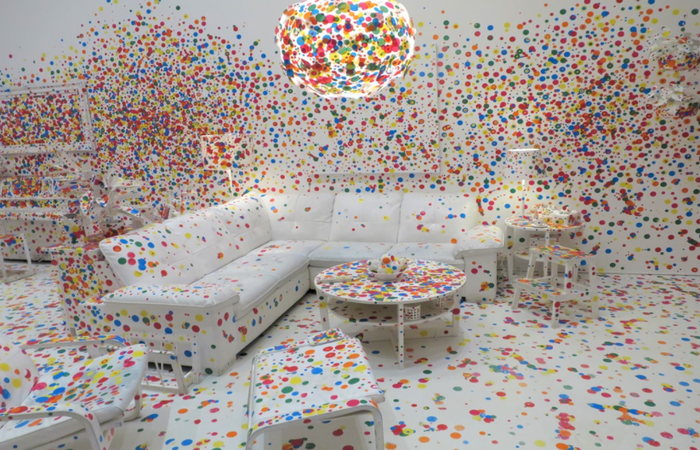

In [7]:
ShowLocalImage('othermathclub/images/egon','pointillist_room.png',700,450)

*Egon gets loose in your living room... oh dear...*


### Friendly introduction

Now that you have met Egon with his dice and his cans of paint you are a bona fide citizen of
Monte Carlo. Fortunately the city is obsessed with mathematics and art. It is also notable 
that the citizens of Monte Carlo consider *food* to be a form of *art*; and they have a saying 
to celebrate this idea. It goes: *'Thou are what thou eatest; thus thou art.'* I think this
means that every citizen considers themselves and everyone else a work of art. 


Just the other day someone
formed a ${\large \pi e}$ club that divides its time between calculating ${\large \pi}$ 
(using Monte Carlo methods) and baking different sorts of $pie$, 
particularly mandarin orange pie, fig pie, persimmon pie, 
pomegranate pie, pistachio pie, carob pie, cactus pear pie, and loquat cake.


On this Notebook two items are complete. The first is Egon trying out a new rule; and the second
is where I managed to build a Monte Carlo program for calculating the value of $\pi$. 


However the rest of this Notebook is under construction as I try and figure out how to animate Sally's walk
along the wharf. (Recall she banged her head on an anchor and may or may not make it back to her boat.)

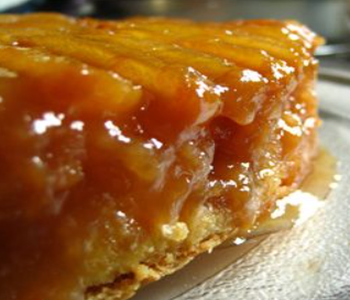

In [8]:
ShowLocalImage('othermathclub/images/food','loquat_cake.png',350,300)

*Some loquat cake... you can see why people who only eat pie might try some loquat cake*


### First part: Egon tries out a new rule


Egon noticed that a square (rather than a triangle) creates a fairly *un*-interesting pattern. To check
this you can return to Notebook **1 C Monte Carlo** and run the very last program at the botton. Move the
slider to select 4 cans and keep the distance at 0.5. You should see a rather boring result. 


Egon thought 'Perhaps I could modify the procedure to make this more interesting...' and his first idea 
was to only select a new vertex if it was not the one he just used. That is: Suppose he chooses vertex
A among four possibilities A, B, C, and D. Then his next choice must be from among B, C and D only. A is not
allowed. Of course A is allowed on the step after this one. 

In [11]:
import numpy as np
import random as r
from ipywidgets import *
from traitlets import dlink


# FMP stands for 'follow many paths'
#   This means that Egon gets all possible outcomes on his dice at once
#   We have four states of the two radio button choices...
#     noRepeats is True: We can never select the same vertex twice
#     noNextClockwise is True: We can never select the next-clockwise vertex
#   So FMP0R0N means both are False
#      FMP1R1N means both are True
# recursive methods to generate paint dot locations
# a is an x, y tuple of where we are
# level is the depth for bailing out
# endLevel is the bail out level
# nCans is how many vertices we have
# colorList is the colors indexed by vertex
# howFar is the distance to move
# v is a list of nCans vertics as x, y tuples
# x, y and mycolors are extensible lists of coordinates and colors
# colormod is the modulus to make sure we get a good color
# thisTarget is the index of the vertex we were headed towards when we landed here
def FMP1R0N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R0N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP0R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP0R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP1R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget and i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def EgonVariations(nCans, howFar, noRepeats, noNextClockwise):
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth of the algorithm
    if nCans <= 3: nDepth = 10
    elif nCans == 4: nDepth = 9
    elif nCans == 5: nDepth = 8
    elif nCans == 6: nDepth = 7
    elif nCans == 7: nDepth = 6
    elif nCans <= 10: nDepth = 5
    elif nCans <= 15: nDepth = 4
    else: nDepth = 3

    # place our paint cans regularly (no random location option)
    centerx, centery, radius = 0.5, 0.5, 0.5
    delta_angle = np.pi * 2.0 / float(nCans)
    this_angle = 0.0
    for i in range(nCans):
        v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
        this_angle += delta_angle

    # recursive paint-dot locator... all the myriad ways
    if noRepeats and not noNextClockwise:
        FMP1R0N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif not noRepeats and noNextClockwise: 
        FMP0R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif noRepeats and noNextClockwise:
        FMP1R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    else:
        print("Both radio buttons are off! Use the version on the 1 C Monte Carlo notebook for this!")

    # Draw the scatter plot of (x, y) pairs
    figdim = 13
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(EgonVariations, \
         nCans=widgets.IntSlider(min=2,max=13,step=1,value=4,continuous_update=False),\
         howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5,continuous_update=False),\
         noRepeats=widgets.Checkbox(value=False,continuous_update=False),
         noNextClockwise=widgets.Checkbox(value=True,continuous_update=False)\
        )

interactive(children=(IntSlider(value=4, continuous_update=False, description='nCans', max=13, min=2), FloatSl…

<function __main__.EgonVariations>

### Calculate $\pi$ using Monte Carlo (random numbers)


Here is a challenge: If you could generate a million random numbers between 0 and 1... how could you use those numbers to calculate $\pi$???


We calculate $\pi$ using random darts. Each dart lands in a square; either inside or outside a circle. We will not be able to calculate pi very *accurately* using this first idea; but approximate will be fun! 


Both of these ideas rely on the notion that the area of a circle with a radius of 1 is pi. The argument for this idea is built into one of the other math club team activities. 

In [13]:
# This is a Monte Carlo method program.
# Throw some darts at a dart board: If they land inside a quarter-circle they are 'hits'
# The ratio of hits to darts is the ratio of the quarter circle to a square of area 1
# Can you determine why we then multiply by four to get the area of the circle?
from ipywidgets import *
from traitlets import dlink
import numpy as np
import random as r

def ThrowDarts(dParam):
    x,y,c=[],[],[]
    hits = 0.0
    nDarts = dParam**3 + 5
    for i in range(nDarts):
        xd, yd = r.random(), r.random()
        if xd*xd+yd*yd < 1.0: 
            hits += 1.0
            c.append('r')
        else: c.append('k')
        x.append(xd)
        y.append(yd)
    if nDarts < 1000000: 
        print('In Monte Carlo we threw', nDarts, 'darts so the circle area is about', '%.7f' % (4.0*hits/nDarts))
    else: 
        print('%3.1f' % (nDarts/1000000.), 'million darts, circle area ~', '%.7f' % (4.0*hits/nDarts))

    # standard plot
    if nDarts < 200000:
        print('(hang on for a couple seconds while the picture gets drawn)')
        figdim = 5
        plt.figure(figsize=(figdim,figdim))
        plt.axis('equal')
        plt.scatter(x, y, s=1, marker='.', color=c)
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])
        plt.show()
    else: print('(Use less than two hundred thousand darts to see a picture of where they all landed)')

interact(ThrowDarts, dParam=widgets.IntSlider(min=1,max=200,step=1,value=1, continuous_update=False))

interactive(children=(IntSlider(value=1, continuous_update=False, description='dParam', max=200, min=1), Outpu…

<function __main__.ThrowDarts>

# ${\Huge \ngtr}$


Alas this is where the sidewalk ends and where the work begins... on what comes next. Everything below here is *under construction*.

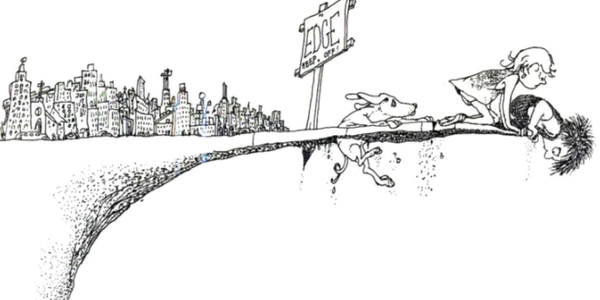

In [14]:
ShowLocalImage('othermathclub/images/people/','where_the_sidewalk_ends.png',600,300)

From here there is no more OMC content at the moment in this notebook.
What is next is to create a heat map of width versus length of the pier (color is probability) and then create 
a little animation of a person walking the pier.

### Sally the Pirate

Remember Sally the Pirate? We met her at the top of the previous **Monte Carlo** notebook. You may recall that
she accidentally bumped her head on an anchor on the way back to her pirate ship; and is now very dizzy. As
a result she takes one step forward and then stumbles randomly to the left or right one step. Let's set up a program
to track her progress along the wharf. Again: For each step forward she stumbles left or right by one step.

In [19]:
import numpy as np
from random import randint
from ipywidgets import *
from traitlets import dlink


def SallyStats(nStepsWide, nStepsLong, nTrials):
    nFallOff = 0
    nFallOffRight = 0
    nFallOffLeft = 0
    for i in range(nTrials):
        lateralPosition = nStepsWide/2 + 1
        if i == 0: print(lateralPosition)
        for steps in range(nStepsLong):
            lateralPosition += 2*randint(0,2)-1
            if i == 0: print(lateralPosition)
            if lateralPosition == 0:
                nFallOffLeft += 1
                nFallOff += 1
                break
            if lateralPosition == nStepsWide + 1:
                nFallOffRight += 1
                nFallOff += 1
                break
    ratio = float(nFallOff)/float(nTrials)
    print('fell off', nFallOff, 'times in',nTrials,'attempts:', '%.10f' % ratio, '(L/R = ',nFallOffLeft,'',nFallOffRight,')')


interact(SallyStats, nStepsWide=widgets.IntSlider(min=1,max=100,step=1,value=5, continuous_update=False),\
                     nStepsLong=widgets.IntSlider(min=1,max=200,step=1,value=10, continuous_update=False),\
                     nTrials=widgets.IntSlider(min=100,max=2100,step=100,value=100, continuous_update=False)
        )

interactive(children=(IntSlider(value=5, continuous_update=False, description='nStepsWide', min=1), IntSlider(…

<function __main__.SallyStats>

In [20]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
# from JSAnimation import IPython_display
# from matplotlib import animation
import numpy as np
from random import randint
from ipywidgets import *
from traitlets import dlink

# put the resulting figure below this cell in the browser
# %pylab inline


# create a simple animation
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 200), ylim=(-10, 10))
# line, = ax.plot([], [], lw=2)
# x = np.linspace(0, 10, 1000)

xc, yc, c = [],[],[]
nStepsWide = 21
nStepsLong = 100

def SallyWalksTheWharf(frameNumber):
    global xc, yc, c, nStepsWide, nStepsLong
    x0 = 0
    y = 0
    x = [np.array([x0, y])]
    c = ['k']
    # taking the loop out so as to make the method the iterated code
    # for i in range(1, nStepsLong+1):
    y += 2*randint(0, 2)-1
    x.append([i, y])
    c.append('r')
    xc, yc = [q[0] for q in x], [q[1] for q in x] 
    figWid = nStepsLong * 14 / 100
    figHgt = nStepsWide * 3 / 21
    plt.figure(figsize=(figWid,figHgt))
    plt.axes(xlim=(0, nStepsLong), ylim=(-nStepsWide/2, nStepsWide/2))
    plt.scatter(xc, yc, s=160, marker='.', color=c)
    plt.plot(xc, yc, lw=2, color='k')
    
#SallyWalksTheWharf(21,100)
# interact(SallyWalksTheWharf, nStepsWide=widgets.IntSlider(min=1,max=100,step=1,value=21, continuous_update=False),\
#                             nStepsLong=widgets.IntSlider(min=1,max=200,step=1,value=100, continuous_update=False))

def initSally():
    line.set_data([], [])
    return line,

def animateSally(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

# animation.FuncAnimation(fig, SallyWalksTheWharf, init_func=initSally, frames=100, interval=1, blit=True)

In [22]:
# oh dear this is dreadful
# we should be using 
# !conda install JSAnimation

if False:
    !pwd; \
    cd ..; \
    mkdir js2; \
    cd js2; \
    pwd; \
    wget https://github.com/jakevdp/JSAnimation/archive/master.zip; \
    unzip master.zip; \
    cd JSAnimation-master; \
    python setup.py install --user; \
    pwd


In [23]:
"""
Lorenz animation
Adapted from http://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
"""

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

from JSAnimation import HTMLWriter

N_trajectories = 20


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 2, 500)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t) for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c) for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c, ms=4) for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i + 1].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=30, blit=True)

# set embed_frames=False so that frames will be stored individually
anim.save('lorenz_animation.html', writer=HTMLWriter(embed_frames=False))

SyntaxError: invalid syntax (<ipython-input-23-bb7e392cc061>, line 19)

In [24]:
from JSAnimation import examples

%pylab inline
examples.basic_animation()

# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)

ModuleNotFoundError: No module named 'JSAnimation'